### **Importing Libraries and Creating Functions**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (320, 320))
            images.append(img)
    return images

In [10]:
def get_array(folder):
    arrays = np.array(load_images_from_folder(folder))
    arrays = np.reshape(arrays, (arrays.shape[0], arrays.shape[1]*arrays.shape[2]))
    return arrays, arrays.shape[0]

### **Loading and Pre-Processing**

In [11]:
fist_folder = "C:\\Users\\Jay\\Desktop\\SM Images\\Fist\\"
fist, count_fist = get_array(fist_folder)

In [12]:
print(fist.shape)

(194, 102400)


In [13]:
tu_folder = "C:\\Users\\Jay\\Desktop\\SM Images\\ThumbsUp\\"
thumbsup, count_tu = get_array(tu_folder)

In [14]:
print(thumbsup.shape)

(510, 102400)


In [15]:
yo_folder = "C:\\Users\\Jay\\Desktop\\SM Images\\Yo\\"
yo, count_yo = get_array(yo_folder)

In [16]:
print(yo.shape)

(788, 102400)


In [17]:
five_folder = "C:\\Users\\Jay\\Desktop\\SM Images\\5\\"
five, count_five = get_array(five_folder)

In [18]:
print(five.shape)

(479, 102400)


In [19]:
two_folder = "C:\\Users\\Jay\\Desktop\\SM Images\\2\\"
two, count_two = get_array(two_folder)

In [20]:
print(two.shape)

(484, 102400)


In [21]:
blank_folder = "C:\\Users\\Jay\\Desktop\\SM Images\\Blank\\"
blank, count_blank = get_array(blank_folder)

In [22]:
print(blank.shape)

(192, 102400)


### **Assigning Labels and Compiling the Data**

In [23]:
y = np.array([0 for i in range(count_fist)])
y = np.append(y, np.array([1 for i in range(count_tu)]))
y = np.append(y, np.array([2 for i in range(count_yo)]))
y = np.append(y, np.array([3 for i in range(count_five)]))
y = np.append(y, np.array([4 for i in range(count_two)]))
y = np.append(y, np.array([5 for i in range(count_blank)]))

In [24]:
y = to_categorical(y)

In [25]:
y.shape

(2647, 6)

In [26]:
x = np.vstack((fist, thumbsup, yo, five, two, blank))
x.shape

(2647, 102400)

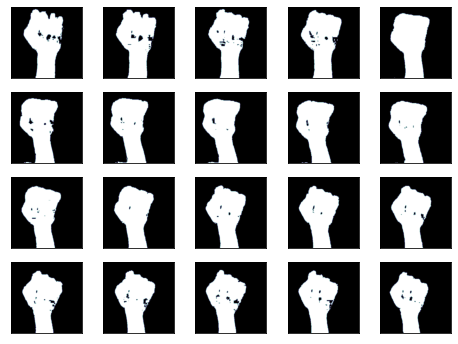

In [27]:
fig = plt.figure(figsize=(8, 6))
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x[i+100].reshape(320,320), cmap=plt.cm.bone)

### **Principal Component Analysis**

In [28]:
pca = PCA()
pca.fit(x)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

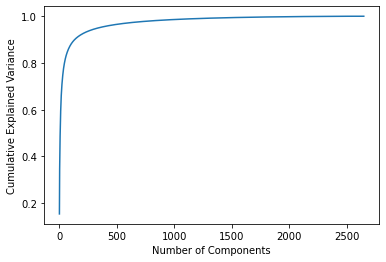

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [30]:
sum(pca.explained_variance_ratio_[0:400])

0.9569496432022787

In [31]:
pca = PCA(400)
x = pca.fit_transform(x)

In [32]:
import pickle as pk   
pk.dump(pca, open("pca_400.pkl","wb"))

### **Splitting Test and Train Datasets**

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2117, 400) (2117, 6)
(530, 400) (530, 6)


### **Creating an Artificial Neural Networks Model**

In [34]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation = 'relu', input_shape = (400,)))
nn.add(layers.Dense(256, activation = 'relu'))
nn.add(layers.Dense(64, activation = 'relu'))
nn.add(layers.Dense(6, activation = 'softmax'))
nn.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [35]:
filepath = 'best_model_PCA_400.hdf5'
mc = ModelCheckpoint(filepath = filepath, monitor = 'val_accuracy', save_only_best = True, verbose = 1)

start = time.time()
history = nn.fit(x_train, y_train, epochs = 100, validation_split = 0.2, batch_size = 50, callbacks = [mc])
end = time.time()

Epoch 1/100
31/34 [==========================>...] - ETA: 0s - loss: 119.8026 - accuracy: 0.7910
Epoch 00001: saving model to best_model_PCA_400.hdf5
34/34 [==============================] - 0s 14ms/step - loss: 111.4679 - accuracy: 0.8015 - val_loss: 16.1527 - val_accuracy: 0.9292
Epoch 2/100
31/34 [==========================>...] - ETA: 0s - loss: 4.7002 - accuracy: 0.9729
Epoch 00002: saving model to best_model_PCA_400.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 4.3622 - accuracy: 0.9740 - val_loss: 5.3697 - val_accuracy: 0.9717
Epoch 3/100
31/34 [==========================>...] - ETA: 0s - loss: 1.5238 - accuracy: 0.9897
Epoch 00003: saving model to best_model_PCA_400.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 1.3951 - accuracy: 0.9905 - val_loss: 4.0761 - val_accuracy: 0.9717
Epoch 4/100
31/34 [==========================>...] - ETA: 0s - loss: 0.5721 - accuracy: 0.9929
Epoch 00004: saving model to best_model_PCA_400.hdf5
34/34 [========

[0. 0. 1. 0. 0. 0.]


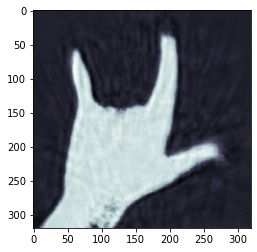

In [37]:
i = 160
print(y_test[i])
projected = pca.inverse_transform(x_test)
plt.imshow(projected[i].reshape(320,320),cmap = plt.cm.bone)

In [38]:
nn.evaluate(x_test, y_test)

17/17 [==============================] - 0s 2ms/step - loss: 3.4910 - accuracy: 0.9943


[3.49100399017334, 0.994339644908905]

### **Testing on Live Image**

In [48]:
outputs = ['fist', 'thumbs up', 'yo', 'five', 'two', 'blank']
cap = cv2.VideoCapture(0)
cap.set(3, 480)
cap.set(4, 640)
while(True):
    ret, frame = cap.read()
    temp = np.array(frame)
    sub = temp[0:320, 320:640, :].copy()
    cv2.rectangle(temp, (320, 0), (640, 320), (255,255,255), 1)
    
    colorSep = cv2.cvtColor(sub, cv2.COLOR_BGR2HSV)
    skinLowRange = np.array([0,20,70], dtype=np.uint8)
    skinUpRange = np.array([20,255,255], dtype=np.uint8)
    skin = cv2.inRange(colorSep, skinLowRange, skinUpRange)
    skin = cv2.GaussianBlur(skin, (3, 3), 100)
    
    cv2.imshow('skin', skin)
    
    skin = skin.reshape(1,320*320)
    skin = pca.transform(skin)
    pred = nn.predict(skin)
    if pred[0][0] >= 0.9: text = outputs[0]
    elif pred[0][1] >= 0.9: text = outputs[1]
    elif pred[0][2] >= 0.9: text = outputs[2]
    elif pred[0][3] >= 0.9: text = outputs[3]
    elif pred[0][4] >= 0.9: text = outputs[4]
    elif pred[0][5] >= 0.9: text = outputs[5]
        
    cv2.putText(sub, text, (50, 50),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_4)
    
    cv2.imshow('Hand Placement', sub)
    cv2.imshow('Camera', temp)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()